In [1]:
import pandas as pd
model_data = pd.read_csv('model_lefty.csv')

In [2]:
model_data.drop(columns=['Unnamed: 0'], inplace=True)

In [3]:
#not sure why there are null values
#going to drop them
model_data.isna().sum()

pitch_name           2082
release_speed        1768
events                  0
description             0
launch_speed            0
launch_angle            0
hit_location            0
release_spin_rate       0
bauer_units             0
dtype: int64

In [4]:
model_data.pitch_name.dropna(inplace=True)

In [5]:
model_data.release_speed.dropna(inplace=True)

In [6]:
model_data.pitch_name.isna().value_counts()

False    774421
Name: pitch_name, dtype: int64

In [7]:
#no null values
model_data.pitch_name.isna().value_counts()

False    774421
Name: pitch_name, dtype: int64

In [8]:
#for some reason null values arent dropping
model_data.isnull().sum()

pitch_name           2082
release_speed        1768
events                  0
description             0
launch_speed            0
launch_angle            0
hit_location            0
release_spin_rate       0
bauer_units             0
dtype: int64

In [15]:
#going to need to encode events and description columns to convert to numbers
model_data

,pitch_name,release_speed,events,description,launch_speed,launch_angle,hit_location,release_spin_rate,bauer_units
0,Cutter,90.4,out,line_drive,79.1,22.000000,7.0,2449.000000,27.090708
1,Slider,81.5,X,ball,0.0,14.462875,0.0,2293.000000,28.134969
2,Curveball,77.1,X,ball,0.0,14.462875,0.0,2543.000000,32.983139
3,Cutter,87.6,X,strike,0.0,14.462875,0.0,2513.000000,28.687215
4,Cutter,86.2,X,strike,0.0,14.462875,0.0,2422.000000,28.097448
5,4-Seam Fastball,91.8,X,ball,0.0,14.462875,0.0,2115.000000,23.039216
6,Cutter,88.1,single,ground_ball,89.1,3.000000,9.0,2465.000000,27.979569
7,Curveball,77.2,X,ball,0.0,14.462875,0.0,2514.000000,32.564767
8,Slider,80.0,X,ball,0.0,14.462875,0.0,2157.666618,24.636407
9,4-Seam Fastball,89.5,X,strike,75.0,35.000000,0.0,2438.000000,27.240223


In [9]:
test_data = model_data.loc[100:750000:70]

In [10]:
#going to test 10,700 rows
test_data.shape

(10713, 9)

In [35]:
X = test_data.drop('pitch_name', axis =1)
y = test_data.pitch_name

In [36]:
X.shape

(10691, 8)

In [37]:
#going to encode events and description column
X = pd.concat([X, pd.get_dummies(X.events, prefix ='event')], axis=1)

In [38]:
X = pd.concat([X, pd.get_dummies(X.description, prefix ='description')], axis=1)

In [39]:
#have to drop original columns now
X.drop(columns=['events', 'description'], inplace = True)

In [40]:
X.shape

(10691, 25)

In [41]:
y.shape

(10691,)

In [34]:
test_data.dropna(inplace=True)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
#train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [43]:
#performing a logistic regression to see the baseline
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
X.dropna(inplace=True)

In [44]:
classifier.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.5659765527562983
Testing Data Score: 0.5495697717919941


In [46]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['Changeup' '4-Seam Fastball' 'Slider' 'Slider' '4-Seam Fastball' 'Slider'
 '4-Seam Fastball' 'Slider' '4-Seam Fastball' '4-Seam Fastball']
First 10 Actual labels: ['Changeup', 'Sinker', 'Slider', 'Slider', '4-Seam Fastball', 'Cutter', '4-Seam Fastball', 'Changeup', '4-Seam Fastball', '2-Seam Fastball']


In [47]:
 pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,Changeup,Changeup
1,4-Seam Fastball,Sinker
2,Slider,Slider
3,Slider,Slider
4,4-Seam Fastball,4-Seam Fastball
5,Slider,Cutter
6,4-Seam Fastball,4-Seam Fastball
7,Slider,Changeup
8,4-Seam Fastball,4-Seam Fastball
9,4-Seam Fastball,2-Seam Fastball


In [48]:
#importing SGD cal
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
SGD.fit(X_train,y_train)

/Users/nickrad/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
#scores are horrible
SGD.score(X_test, y_test)

0.1425364758698092

In [55]:
predict = SGD.predict(X_test)

In [57]:
y_test[:10]

379850           Changeup
521390             Sinker
488280             Slider
614000             Slider
628350    4-Seam Fastball
683510             Cutter
146610    4-Seam Fastball
46230            Changeup
121270    4-Seam Fastball
522370    2-Seam Fastball
Name: pitch_name, dtype: object

In [58]:
predict

array(['Changeup', 'Changeup', 'Changeup', ..., 'Changeup', 'Changeup',
       'Changeup'], dtype='<U15')

In [59]:
classifier.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [60]:
SGD.feature_importances_

AttributeError: 'SGDClassifier' object has no attribute 'feature_importances_'

In [62]:
#trying gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [63]:
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.6617610376652532


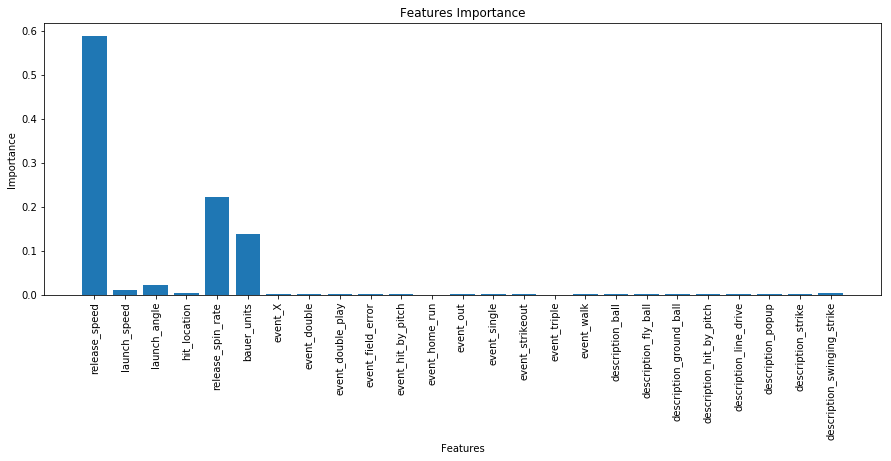

In [68]:
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [69]:
model.fit(X_test, y_test)
# R-squared is 1.0, best possible score
print(f"R-squared = {model.score(X_train,y_train)}")

R-squared = 0.5685956597655276


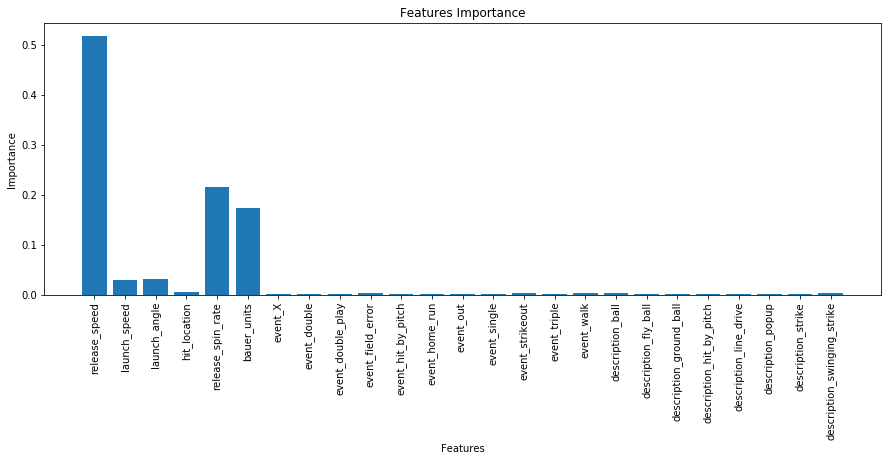

In [70]:
#I think i dont want to get dummies for events, just want to the computer to read it as one column

plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()